# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 18:18:38--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 18:18:38 (48.0 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

In [2]:
!wc -l abq-food-inspections-fy2010.csv

17557 abq-food-inspections-fy2010.csv


In [3]:
!pwd

/home/jovyan/work


In [4]:
!csvcut -n abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


So we have 17557 observations in the dataset and 27 columns. We can transfer the dataset into csvlook:

In [5]:
!head -3 abq-food-inspections-fy2010.csv | csvlook

|----------------------+--------------+-------------------------------+-------------+-------+-------+-----------+---------------------+--------------------+---------------+-------------+-------------+------------------+------------+------------------+------------------------------+---------------------+-----------------+-------------------------+------------+-------------+-------------+-------------+----------------+----------------+----------------------------------+------------------|
|  FACILITY_NAME       | FACILITY_KEY | SITE_ADDRESS                  | CITY        | STATE | ZIP   | OWNER_KEY | OWNER_NAME          | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | STREET_TYPE | POST_DIRECTIONAL | PHONE      | PROGRAM_CATEGORY | PROGRAM_CATEGORY_DESCRIPTION | INSPECTION_DATE     | INSPECTION_TYPE | INSPECTION_DESC         | SERIAL_NUM | ACTION_CODE | ACTION_DESC | RESULT_CODE | RESULT_DESC    | VIOLATION_CODE | VIOLATION_DESC                   | INSPECTION_MEMO  |
|---------------

## My findings for the initial exploration

Questions 1.What do all the columns mean?


1.This is a dataset named 'Food Inspections', produced by the City of Albuquerque Information Technology Services Division. It shows the results of the restaurant inspection in Albuquerque. Notice that if you want to check the results of other states and cities, you may go to: http://us-city.census.okfn.org/dataset/food-safety. The dataset is updated on the daily basis and the last time to be modified is 23-Oct-2016 10:18.

Here shows the meaning of different columns:

FACILITY_NAME (string): Name of the facility where the inspection occurred

FACILITY_KEY (string) : ID of the facility where the inspection occurred

SITE_ADDRESS (string) : Street address of the facility where the inspection occurred

CITY (string): City of the facility where the inspection occurred

STATE (string) : State of the facility where the inspection occurred

ZIP (string) : Zip of the facility where the inspection occurred

OWNER_KEY (string ) : ID of the Owner of the facility where the inspection occurred at the 
time of the inspection

OWNER_NAME (string) : Name of the Owner of the facility where the inspection occurred at the time of the inspection

NATURE_OF_BUSINESS (string ) : The type of business, originally for internal use only, provides information about the business. This is not the information provided on the federal tax form.

STREET_NUMBER (string) : Street number of the facility where the inspection occurred

STREET_NAME (string) : Street name of the facility where the inspection occurred

STREET_TYPE (string) : Street type of the facility where the inspection occurred

STREET_TYPE (string): Street type of the facility where the inspection occurred

POST_DIRECTIONAL (string): Postal direction of the facility where the inspection occurred

PHONE (string ): Phone number of the facility where the inspection occurred

PROGRAM_CATEGORY (string): Id that indicates the type of facility permit the inspection was performed

PROGRAM_CATEGORY_DES CRIPTION (string): Descript of the id that indicates the type of facility 
permit the inspection was performed

INSPECTION_DATE (dateTime): Date the inspection occurred

INSPECTION_TYPE (string): Code for type of inspection

INSPECTION_DESC (string): Description of the inspection

SERIAL_NUM (string): Unique ID for the inspection daily activity. This is a sequential number assigned chronologically as the data is entered into the system. If there are multiple rows with the same OWNER_ID and INSPECTION_DATE and

SERIAL_NUM, it means that there were multiple rows created for one inspection (multiple results were recorded). If there are multiple rows with the same OWNER_ID and INSPECTION_DATE and a different SERIAL_NUM, it means that there were multiple inspections taken on the same day and the highest SERIAL_NUM is intended to be the most recent inspection.

ACTION_CODE (string) : Code of the action taken. If the ACTION_CODE is equal to 00 – NON-

GRADED this indicates that the inspector was unable to actually perform an inspection. The 

RESULT_CODE documents the situation.

ACTION_DESC (string) :Description of the action taken

RESULT_CODE (string) :Code of the result of the inspection

RESULT_DESC (string) : Description of the result of the inspection

VIOLATION_CODE (string) :The code for the violation

VIOLATION_DESC (NVL(SNV, VD) (string) : Description of the violation that was found

INSPECTION_MEMO (string) :Notes from the inspection made by the inspector

Question:2.There are null valus in some colums:
    
3: SITE_ADDRESS 

9: NATURE_OF_BUSINESS 

10: STREET_NUMBER 

11: STREET_NAME 

12: STREET_TYPE 

13: POST_DIRECTIONAL 

14: PHONE 

16: PROGRAM_CATEGORY_DESCRIPTION 

18: INSPECTION_TYPE 

25: VIOLATION_CODE 

26: VIOLATION_DESC 

27: INSPECTION_MEMO

Questions 3.Which columns interest you the most?

The columns I am interested are FACILITY_NAME, CITY, STATE, ZIP, NATURE_OF_BUSINESS, STREET_NUMBER, INSPECTION_TYPE, INSPECTION_DESC, RESULT_DES, VIOLATION_CODE, VIOLATION_DESC. I belive these columns will help me to find answers for some questions that I have.

Questions 4.Which columns present some complications or questions you would like to ask?

I have following questions:
1. Restaurants in which type of businesss, and zip areas are most like to be inspected?
2. What's the result of inspection of restaurants for different type of business?
3. Which kind of resutarant are most likely to be inspected for multiple time? What features do these restaurants have?

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Now we'll load the data in more simply. Note that this requires the use of an absolute path, so adjust it to your location:


In [7]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [8]:
!createdb -U dbuser w7

In [9]:
%sql postgresql://dbuser@localhost:5432/w7

'Connected: dbuser@w7'

In [10]:
!shuf -n 20000 abq-food-inspections-fy2010.csv | csvstat

  1. OOB M & S FOODS
	<class 'str'>
	Nulls: False
	Unique values: 2616
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ECHO INC:	68
		ISLETA AMPHITHEATER:	68
	Max length: 77
  2. 30252
	<class 'str'>
	Nulls: False
	Unique values: 2836
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
	Max length: 12
  3. 3010 EUBANK BLVD NE 
	<class 'str'>
	Nulls: True
	Unique values: 2457
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. ALBUQUERQUE
	<class 'str'>
	Nulls: False
	Values: CITY, ALBUQUERQUE
  5. NM
	<class 'str'>
	Nulls: False
	Values: 87, STATE, NM
  6. 87111
	<class 'str'>
	Nulls: False
	Unique values: 49
	5 most frequent values:
		87110:	1996
		87108:	1976
		87102:	1601
		87106:	1568
		87109:	1552
	Max length: 10
  7

In [11]:
%%sql
DROP TABLE IF EXISTS inspection;

Done.


[]

Now we need to create a blank table to store our data. When creating the table, we need change the max value of some columns.

In [12]:
%%sql
CREATE TABLE food
(
    FACILITY_NAME VARCHAR(77),
    FACILITY_KEY INTEGER,
    SITE_ADDRESS VARCHAR(35),
    CITY VARCHAR(11),
    STATE CHAR(5),
    ZIP CHAR(10),
    OWNER_KEY INTEGER,
    OWNER_NAME VARCHAR(82),
    NATURE_OF_BUSINESS VARCHAR(25),
    STREET_NUMBER CHAR(13),
    STREET_NAME VARCHAR(24),
    STREET_TYPE CHAR(11),
    POST_DIRECTIONAL CHAR(16),
    PHONE CHAR(15),
    PROGRAM_CATEGORY CHAR(16),
    PROGRAM_CATEGORY_DESCRIPTION VARCHAR(40),
    INSPECTION_DATE TIMESTAMP(19),
    INSPECTION_TYPE CHAR(4),
    INSPECTION_DESC VARCHAR(32),
    SERIAL_NUM VARCHAR(10),
    ACTION_CODE CHAR(11),
    ACTION_DESC VARCHAR(34),
    RESULT_CODE CHAR(11),
    RESULT_DESC VARCHAR(37),
    VIOLATION_CODE CHAR(14),
    VIOLATION_DESC VARCHAR(50),
    INSPECTION_MEMO CHAR(5)
)

Done.


[]

Now we'll load the data. Note that this requires the use of an absolute path, so adjust it to your location:

In [13]:
%%sql
COPY food FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [14]:
%%sql
SELECT COUNT(*) FROM food;

1 rows affected.


count
17556


So we have 17556 observations in the table. Now we are ready to do some deep exploration of the dataset and try to identify some inplications!

## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

## Indexing

In [15]:
%%sql
DROP INDEX IF EXISTS id_owner_name;
CREATE INDEX id_owner_name ON food(facility_name, facility_key,owner_name,owner_key,inspection_date,serial_num);

Done.
Done.


[]

In [16]:
%%sql
DROP INDEX IF EXISTS id_inspection_date;
CREATE INDEX id_inspection_date ON food(facility_name, facility_key,owner_name,owner_key,inspection_date,serial_num);

Done.
Done.


[]

## Some ETL with SQL

Let's see the summary of the dataset

In [17]:
%%sql
SELECT column_name, data_type, character_maximum_length
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'food';

27 rows affected.


column_name,data_type,character_maximum_length
facility_name,character varying,77
facility_key,integer,None
site_address,character varying,35
city,character varying,11
state,character,5
zip,character,10
owner_key,integer,None
owner_name,character varying,82
nature_of_business,character varying,25
street_number,character,13


In [18]:
%%sql
SELECT * FROM food
LIMIT 10;

10 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_description,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,34,Food contact surfaces,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,35,Non-Food contact surfaces,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,EMERGENCY RESPONSE,DA7757250,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,ROUTINE FOOD INSPECTION,DA7757248,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None


### Some query

1.How many inspection types are there? What are they?

In [19]:
%%sql
SELECT DISTINCT INSPECTION_TYPE, INSPECTION_DESC
FROM food
ORDER BY INSPECTION_desc;

15 rows affected.


inspection_type,inspection_desc
None,ADDITIONAL SERVICE PROVIDED
None,COMPLAINT FOOD INSPECTION
None,E-MAIL
None,EMERGENCY RESPONSE
None,FIRE CALL
None,FOLLOW-UP DOCUMENTATION RECEIVED
None,FOOD FOLLOW-UP INSPECTION
None,IMMINENT HEALTH HAZARD
None,MANAGERIAL ASSISTANCE
None,MOBILE UNIT FOOD INSPECTION


2.How many action types are there? What are they?

In [20]:
%%sql
SELECT DISTINCT ACTION_CODE, ACTION_DESC
FROM food
ORDER BY ACTION_CODE;

8 rows affected.


action_code,action_desc
00,NON-GRADED
03,FACILITY CLOSED AT TIME OF SERVICE
06,UNSATISFACTORY
09,ANNUAL STICKER ISSUED
10,ANNUAL STICKER NOT ISSUED
11,APPROVED
12,NO PERMIT APPLICATION ISSUED
17,FOOD PERMIT SUSPENSION


3.which restaurants are suspended from a food permit?

In [21]:
%%sql
SELECT DISTINCT facility_name, facility_key
FROM food
WHERE action_code = '17'
ORDER BY facility_name;

1 rows affected.


facility_name,facility_key
OOB ICE CREAM RICA,82705


It seems that the restaurant named "OOB ICE CREAM RICA" was the only one who are suspended from a food permit. This is a heavy penalty.

4.which restaurants were not inspected by the inspector?

In [22]:
%%sql
SELECT DISTINCT facility_name
FROM food
WHERE action_code = '00'
GROUP BY facility_name
ORDER BY facility_name;

1897 rows affected.


facility_name
00BSAY IT WITH CAKE
328 CHINESE CUISINE
66 DINER
7 BAR ELEMENTARY SCHOOL
7 ELEVEN 57722
7 ELEVEN 700
7 ELEVEN 702
7 ELEVEN 703
7 ELEVEN 705
7 ELEVEN 706


1897 facilities were not inspected

In [23]:
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


5.what are the resuls of the inspection and how many types are there?

In [41]:
%%sql
SELECT result_desc, COUNT(*) AS count
FROM food
WHERE inspection_desc IN (
    SELECT inspection_desc
    FROM food
    GROUP BY inspection_desc
    ORDER BY COUNT(*) 
    )
GROUP BY result_desc
ORDER BY count DESC;

19 rows affected.


result_desc,count
IN COMPLIANCE,14389
NOT APPLICABLE,2416
DOWNGRADE,214
OUT OF BUSINESS,142
TRAINING RECEIVED,104
PHONE CALL,90
UPGRADE,69
IMMEDIATE CLOSURE,45
NOT IN COMPLIANCE,24
FACILITY CLOSED AT TIME OF INSPECTION,19


So there are 19 kinds of results of in spection. And the top 5 result is IN COMPLIANCE, NOT APPLICABLE, DOWNGRADE, OUT OF BUSINESS, TRAINING RECEIVED.

5.what are the resuls of the violation and how many types are there?

In [24]:
%%sql
SELECT violation_desc, COUNT(*) AS count_violation
FROM food
WHERE violation_desc IN (
    SELECT violation_desc
    FROM food
    GROUP BY violation_desc
    ORDER BY COUNT(*) 
    )
GROUP BY violation_desc
ORDER BY count_violation DESC;

70 rows affected.


violation_desc,count_violation
Additional Comments,6353
No Violations Found,3434
Delivered Informational Brochure,1657
Plumbing: Improperly installed/maintained/supplied,492
Non-Food contact surfaces,446
Improper sanitizing,434
Food unprotected,425
"Floors, Walls, Ceilings",406
Food contact surfaces,251
Cold Holding,201


So there are 70 kinds of results of in spection. And the top 5 result is Additional Comments,
No Violations Found, Delivered Informational Brochure,Plumbing: Improperly, installed/maintained/supplied, Non-Food contact surfaces

We can plot them:

<Container object of 70 artists>

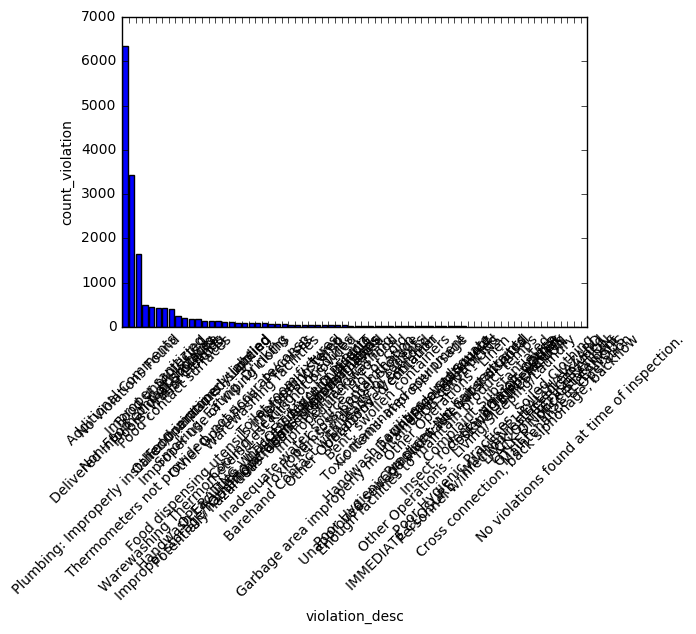

In [25]:
result = _
result.bar()

5.what facilities are most likely to violate?

In [26]:
%%sql
SELECT facility_name, COUNT(*) AS count
FROM food
WHERE violation_desc IN (
    SELECT violation_desc
    FROM food
    GROUP BY violation_desc
    ORDER BY COUNT(*) DESC
    )
GROUP BY facility_name
ORDER BY count DESC
LIMIT 3;

3 rows affected.


facility_name,count
SMITHS FOOD AND DRUG CENTERS INC,149
ISOTOPES PARK - OVATIONS,93
PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR,85


The top 3 facilities that are most likley to violate are: SMITHS FOOD AND DRUG CENTERS INC, ISOTOPES PARK - OVATIONS, and PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR.

<Container object of 3 artists>

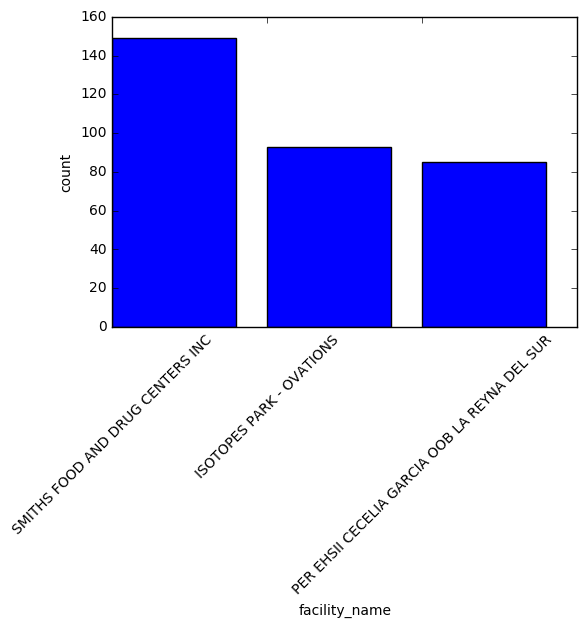

In [27]:
result = _
result.bar()

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

I noticed that there is redundant information in several columns, so we are trying to reduce redundancy and simplify the table.

#### Step 1
First, let's see if we can combine the facility name and the owner name. We start by checking if there is a 1-to-1 relationship between these 2 colums:

In [28]:
%%sql
SELECT DISTINCT COUNT(*), 'facility_name' AS distinct_value
FROM
(
SELECT facility_name
FROM food
GROUP BY facility_name
)t1

UNION ALL

SELECT DISTINCT COUNT(*), 'owner_name' AS distinct_value
FROM
(
SELECT owner_name
FROM food
GROUP BY owner_name
)t2
;

2 rows affected.


count,distinct_value
2615,facility_name
1852,owner_name


The number of distinct facility_name are different from the number of distinct owner_name, a fact means that there is no 1-to-1 relationship between these 2 columns. Therefore, we cannot just simply combine these 2 columns.

In fact, because the number of distinct facility_name are larger than the number of distinct owner_name, we can deduce that some onwer just own multiple facilities at the same time. For example, multiple branches of 7 ELEVEN all belongs to SOUTHWEST CONVENIENCE STORES LLC. 


#### Step 2

Because our main goal is to check the relationship between facilities and inspection, or the relationship between facilities and violation, it's wasteful for us to read so much information such as address, street number, and phone number regarding the facilities. It's better for us to create a new table to store information about the facilities seperately to simply our original table.



In [29]:
%%sql
DROP TABLE IF EXISTS restaurant;

Done.


[]

Firstly, we create a table named "restaurant" to store information about facilities

In [30]:
%%sql
CREATE TABLE restaurant
(
    FACILITY_NAME VARCHAR(77),
    SITE_ADDRESS VARCHAR(35),
    ZIP CHAR(10),
    OWNER_NAME VARCHAR(82),
    NATURE_OF_BUSINESS VARCHAR(25),
    STREET_NUMBER CHAR(13),
    STREET_NAME VARCHAR(24),
    PHONE CHAR(15)
)

Done.


[]

In [31]:
%%sql
INSERT INTO restaurant 
(
    FACILITY_NAME,
    SITE_ADDRESS,
    ZIP,
    OWNER_NAME,
    NATURE_OF_BUSINESS,
    STREET_NUMBER,
    STREET_NAME,
    PHONE
)

SELECT DISTINCT FACILITY_NAME, SITE_ADDRESS, ZIP, OWNER_NAME, NATURE_OF_BUSINESS, STREET_NUMBER, STREET_NAME, PHONE
FROM food;

2835 rows affected.


[]

In [32]:
%%sql
SELECT * FROM restaurant
ORDER BY FACILITY_NAME;


2835 rows affected.


facility_name,site_address,zip,owner_name,nature_of_business,street_number,street_name,phone
00BSAY IT WITH CAKE,10200 GOLF COURSE RD NW STE B,87114,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,5058339563
2000 VIETNAM RESTAURANT,601 SAN MATEO BLVD SE,87108,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,5052320900
328 CHINESE CUISINE,5617 MENAUL BLVD NE STE A,87110,328 CHINESE CUISINE,None,5617,MENAUL,5058814468
5 STAR BURGERS,5901 WYOMING BLVD NE STE P2,87109,5 STAR ABQ INC,RESTAURANT,5901,WYOMING,5057643000
66 DINER,1405 CENTRAL AV NE,87106,66 DINER,RESTAURANT,1405,CENTRAL,5052471421
7 BAR ELEMENTARY SCHOOL,4501 SEVEN BAR LOOP NW,87114,APS,APS SCHOOL FOODSERVICE,4501,SEVEN BAR LOOP,5053455661
7 ELEVEN,6921 TAYLOR RANCH DR NW,87120,SCS BEVERAGE INC,RETAILER,6921,TAYLOR RANCH,None
7 ELEVEN 57722,401 COPPER ST NW,87102,SCS BEVERAGE INC,RETAILER,401,COPPER,5052479843
7 ELEVEN 700,1010 YALE BLVD SE,87106,SCS BEVERAGE INC,RETAILER,1010,YALE,4325808850
7 ELEVEN 702,10320 CANDELARIA RD NE,87112,SCS BEVERAGE INC,RETAILER,10320,CANDELARIA,5052996822


Secondly, we create a table named "inspection" to store the information about inspections. After observing the original table, we find out the serial_num guarantees every results has a unique number, we will use the serial_num as foreigh key.

In [33]:
%%sql
DROP TABLE IF EXISTS inspection;

Done.


[]

In [34]:
%%sql
CREATE TABLE inspection
(
    SERIAL_NUM VARCHAR(10),
    FACILITY VARCHAR(77),
    INSPECTION_DESC VARCHAR(32),
    INSPECTION_DATE TIMESTAMP(19),
    ACTION_DESC VARCHAR(34),
    RESULT_DESC VARCHAR(37)
)

Done.


[]

In [35]:
%%sql
INSERT INTO inspection
(
    SERIAL_NUM,
    FACILITY,
    INSPECTION_DESC,
    INSPECTION_DATE,
    ACTION_DESC,
    RESULT_DESC
)

SELECT DISTINCT SERIAL_NUM,FACILITY_NAME,INSPECTION_DESC, INSPECTION_DATE,ACTION_DESC,RESULT_DESC
FROM food;

9046 rows affected.


[]

In [36]:
%%sql
SELECT * FROM inspection
ORDER BY SERIAL_NUM
LIMIT 10;

10 rows affected.


serial_num,facility,inspection_desc,inspection_date,action_desc,result_desc
DA0040175,OOB DELICIOUS TREATS,PHONE CALL,2009-07-01 00:00:00,NON-GRADED,PHONE CALL
DA0040177,SAMS CLUB 4703,PRE-OPENING FOOD INSPECTION,2009-07-01 00:00:00,APPROVED,IN COMPLIANCE
DA0040180,OOB BUN ON THE RUN,PHONE CALL,2009-07-01 00:00:00,NON-GRADED,PHONE CALL
DA0040182,OOB PER WRITTEN REQUEST 4/24/14 QUE DAWGS,PHONE CALL,2009-07-01 00:00:00,NON-GRADED,PHONE CALL
DA0040183,OOB EL TACO LOCO,ADDITIONAL SERVICE PROVIDED,2009-07-01 00:00:00,NON-GRADED,NOT APPLICABLE
DA0040186,CHILDRENS PROMISE CENTERS,PRE-OPENING FOOD INSPECTION,2009-07-01 00:00:00,APPROVED,IN COMPLIANCE
DA0040193,OOB NAPA VALLEY CAFE LLC,PRE-OPENING FOOD INSPECTION,2009-07-02 00:00:00,APPROVED,IN COMPLIANCE
DA0040194,OOB TOOL BOX EATS,PRE-OPENING FOOD INSPECTION,2009-07-02 00:00:00,APPROVED,IN COMPLIANCE
DA0040195,GENGHIS GRILL,ROUTINE FOOD INSPECTION,2009-07-02 00:00:00,APPROVED,IN COMPLIANCE
DA0040196,ILLEGAL VENDORS A3C,PRE-OPENING FOOD INSPECTION,2009-07-02 00:00:00,NO PERMIT APPLICATION ISSUED,NOT IN COMPLIANCE


Thirdly, when we look at the inspection table and want to know more about the restaurant, we can join the two tables together.

In [37]:
%%sql
SELECT *
FROM restaurant JOIN inspection on facility_name = facility
limit 10
;

10 rows affected.


facility_name,site_address,zip,owner_name,nature_of_business,street_number,street_name,phone,serial_num,facility,inspection_desc,inspection_date,action_desc,result_desc
EL TACO TOTE,4701 CENTRAL AV NE,87108,"CLAUDIA MENDEZ AMMI, INC",FOOD SERVICE,4701,CENTRAL,5052806777,DA8509218,EL TACO TOTE,ROUTINE FOOD INSPECTION,2010-02-08 00:00:00,APPROVED,IN COMPLIANCE
OOB CIRCLE K 6334,7524 MENAUL NE,87110,OOBPCF SALESCO LLC,GAS STATION,7524,MENAUL,3037929467,DA7756109,OOB CIRCLE K 6334,ROUTINE FOOD INSPECTION,2009-08-27 00:00:00,APPROVED,IN COMPLIANCE
LOWES 99 SUPERMARKET,4701 4TH ST NW,87107,PAY-N-SAVE INC.,GROCERY STORE,4701,4TH,8063853366,DA7006033,LOWES 99 SUPERMARKET,ROUTINE FOOD INSPECTION,2009-10-26 00:00:00,APPROVED,IN COMPLIANCE
OOB RAINBOW ICE CREAM,134 VERMONT ST NE STE A,87108,ADOLFO AQUILAR RAMIREZ,SELL ICE CREAM,134,VERMONT,5059755990,DA7256331,OOB RAINBOW ICE CREAM,MOBILE UNIT FOOD INSPECTION,2009-09-25 00:00:00,ANNUAL STICKER ISSUED,IN COMPLIANCE
CIRCLE K 8551,2934 EUBANK BLVD NE,87112,CIRCLE K STORES INC,CONVIENENCE STORE,2934,EUBANK,5057927579,DA0043058,CIRCLE K 8551,PRE-OPENING FOOD INSPECTION,2010-03-08 00:00:00,APPROVED,IN COMPLIANCE
HEALTH HAVEN,1619 SAN MATEO NE,87110,HEALTH HAVEN,RETAIL HEALTH FOOD STORE,1619,SAN MATEO,5058581257,DA8509007,HEALTH HAVEN,ROUTINE FOOD INSPECTION,2010-01-06 00:00:00,APPROVED,IN COMPLIANCE
OOBCAPE FEAR SHAVE ICE AND ICECREAM,10748 STONE HOLLOW PL NW,87114,BYRON IVAN COLOCHO ROQUE,MOBILE UNIT,10748,STONE HOLLOW,5059758745,DA0040301,OOBCAPE FEAR SHAVE ICE AND ICECREAM,PRE-OPENING FOOD INSPECTION,2009-07-14 00:00:00,APPROVED,IN COMPLIANCE
OOB 8/14/13CIRCLE K 6134,6121 LOMAS BLVD NE,87110,OOBPCF SALESCO LLC,GAS STATION,6121,LOMAS,3037929467,DA7256345,OOB 8/14/13CIRCLE K 6134,New Business Inspection,2009-09-29 00:00:00,APPROVED,IN COMPLIANCE
LA CREPE MICHEL,400 SAN FELIPE ST NW,87104,LA CREPE MICHEL,RESTAURANT,400,SAN FELIPE,5052421251,DA7006063,LA CREPE MICHEL,EMERGENCY RESPONSE,2009-10-29 00:00:00,NON-GRADED,NOT APPLICABLE
OOB GREAT AMERICAN STEAK AND SEAFOOD,3300 PRINCETON DR NE #S30,87107,GASS INC,WHOLESALE DISTRIBUTION,3300,PRINCETON,5058844157,DA7007456,OOB GREAT AMERICAN STEAK AND SEAFOOD,New Business Inspection,2010-05-26 00:00:00,ANNUAL STICKER ISSUED,IN COMPLIANCE


### STEP 3 JOINT TABLE QUERY

Now, we can do some queries in the joint table!

1.For example, we want to know the address and phone number of the facility with the serious number of DA0040175.

In [38]:
%%sql
SELECT site_address, phone
FROM restaurant JOIN inspection on facility_name = facility
WHERE serial_num ='DA0040175'

1 rows affected.


site_address,phone
819 PIEDRA LARGA PL NE,5052398601


2.For example, we want to know the inspection and results of RETAIL HEALTH FOOD STORE.

In [39]:
%%sql
SELECT *
FROM restaurant JOIN inspection on facility_name = facility
WHERE nature_of_business= 'RETAIL HEALTH FOOD STORE'

3 rows affected.


facility_name,site_address,zip,owner_name,nature_of_business,street_number,street_name,phone,serial_num,facility,inspection_desc,inspection_date,action_desc,result_desc
HEALTH HAVEN,1619 SAN MATEO NE,87110,HEALTH HAVEN,RETAIL HEALTH FOOD STORE,1619,SAN MATEO,5058581257,DA8509007,HEALTH HAVEN,ROUTINE FOOD INSPECTION,2010-01-06 00:00:00,APPROVED,IN COMPLIANCE
HEALTH HAVEN,1619 SAN MATEO NE,87110,HEALTH HAVEN,RETAIL HEALTH FOOD STORE,1619,SAN MATEO,5058581257,DA8508114,HEALTH HAVEN,ROUTINE FOOD INSPECTION,2009-09-24 00:00:00,APPROVED,IN COMPLIANCE
HEALTH HAVEN,1619 SAN MATEO NE,87110,HEALTH HAVEN,RETAIL HEALTH FOOD STORE,1619,SAN MATEO,5058581257,DA8508116,HEALTH HAVEN,EMERGENCY RESPONSE,2009-09-24 00:00:00,NON-GRADED,NOT APPLICABLE


Here we noticed that the only retail health food store that was inspeted is the 'HEALTH HEAVEN'. By the way, because it has records with multiple serial number, it was inspeted for 3 times.

3.For example, we want to know the inspection and results of facilities owned by "SOUTHWEST CONVENIENCE STORES LLC"

In [40]:
%%sql
SELECT *
FROM restaurant JOIN inspection on facility_name = facility
WHERE owner_name= 'SCS BEVERAGE INC'

60 rows affected.


facility_name,site_address,zip,owner_name,nature_of_business,street_number,street_name,phone,serial_num,facility,inspection_desc,inspection_date,action_desc,result_desc
7 ELEVEN 702,10320 CANDELARIA RD NE,87112,SCS BEVERAGE INC,RETAILER,10320,CANDELARIA,5052996822,DA7756266,7 ELEVEN 702,EMERGENCY RESPONSE,2009-09-22 00:00:00,NON-GRADED,NOT APPLICABLE
7 ELEVEN 706,6201 SAN ANTONIO DR NE,87109,SCS BEVERAGE INC,RETAILER,6201,SAN ANTONIO,9153321301,DA7507227,7 ELEVEN 706,EMERGENCY RESPONSE,2009-12-21 00:00:00,NON-GRADED,NOT APPLICABLE
7 ELEVEN 702,10320 CANDELARIA RD NE,87112,SCS BEVERAGE INC,RETAILER,10320,CANDELARIA,5052996822,DA7756265,7 ELEVEN 702,ROUTINE FOOD INSPECTION,2009-09-22 00:00:00,APPROVED,IN COMPLIANCE
7 ELEVEN 711,9215 INDIAN SCHOOL RD NE,87112,SCS BEVERAGE INC,RETAILER,9215,INDIAN SCHOOL,5052935950,DA7257212,7 ELEVEN 711,ROUTINE FOOD INSPECTION,2010-03-03 00:00:00,APPROVED,IN COMPLIANCE
7 ELEVEN 705,1801 SAN PEDRO DR NE,87110,SCS BEVERAGE INC,RETAILER,1801,SAN PEDRO,9153321301,DA7256916,7 ELEVEN 705,ROUTINE FOOD INSPECTION,2009-12-30 00:00:00,APPROVED,IN COMPLIANCE
7 ELEVEN 710,12524 CENTRAL AV SE,87123,SCS BEVERAGE INC,RETAILER,12524,CENTRAL,9153321301,DA7256729,7 ELEVEN 710,ROUTINE FOOD INSPECTION,2009-12-08 00:00:00,APPROVED,IN COMPLIANCE
7 ELEVEN,6921 TAYLOR RANCH DR NW,87120,SCS BEVERAGE INC,RETAILER,6921,TAYLOR RANCH,None,DA8008488,7 ELEVEN,ROUTINE FOOD INSPECTION,2009-08-19 00:00:00,APPROVED,IN COMPLIANCE
7 ELEVEN 704,3808 MONTGOMERY BLVD NE,87110,SCS BEVERAGE INC,RETAILER,3808,MONTGOMERY,9153321301,DA7757533,7 ELEVEN 704,ROUTINE FOOD INSPECTION,2010-01-20 00:00:00,APPROVED,IN COMPLIANCE
7 ELEVEN 716,1800 LOMAS BLVD NE,87106,SCS BEVERAGE INC,RETAILER,1800,LOMAS,9153321301,DA8508972,7 ELEVEN 716,ROUTINE FOOD INSPECTION,2010-01-04 00:00:00,APPROVED,IN COMPLIANCE
7 ELEVEN 718,2625 WYOMING BLVD NE,87110,SCS BEVERAGE INC,RETAILER,2625,WYOMING,5052926586,DA7756780,7 ELEVEN 718,EMERGENCY RESPONSE,2009-11-04 00:00:00,NON-GRADED,NOT APPLICABLE


### Step 4: WE COULD DO MORE!

We could duplicate these steps and normalize the records about violation. We could also create a new table about violation. But I am not going to write code about this. 


# End.
# Thanks for reading!